In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
nestboot_df = pd.read_csv('../nestboot_results/python_snr_all_methods_results.csv')
tigress_df = pd.read_csv('../nestboot_results/matlab_snr_all_methods_results.csv')


In [ ]:
# nestboot_df['topology']=nestboot_df.network.str.split('/').str[3]
# nestboot_df['snr']=nestboot_df.dataset.str.split('-').str[5]
# nestboot_df['method'] = nestboot_df['method'].apply(lambda x: f'nestboot {x}')
# # nestboot_df=nestboot_df[(nestboot_df.method=='NestBoot LSCO')]
# # nestboot_df.method='nestboot'+nestboot_df.method
# nestboot_df['mcc']=nestboot_df.precision*nestboot_df.recall/np.sqrt((nestboot_df.precision+nestboot_df.recall)/2)

In [ ]:
# nestboot_df.method.replace({'nestboot LASSO':'nestboot lasso','nestboot LSCO':'nestboot lsco'},inplace=True)

/var/folders/sx/x954rbdd44d932dd0ygfp1qc0000gn/T/ipykernel_82946/4286709509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nestboot_df.method.replace({'nestboot LASSO':'nestboot lasso','nestboot LSCO':'nestboot lsco'},inplace=True)


In [15]:
# tigress_df=tigress_df[(tigress_df.method=='tigress')|(tigress_df.method=='lsco')|(tigress_df.method=='lasso')]
# tigress_df['topology']=tigress_df.network.str.split('/').str[3]
# tigress_df['snr']=tigress_df.dataset.str.split('-').str[5]
df.dataset.str.split('-').str[0]

0      SNR0.01
1      SNR0.01
2      SNR0.01
3      SNR0.01
4      SNR0.01
        ...   
186    SNR1.00
187    SNR1.00
188    SNR1.00
189    SNR1.00
190    SNR1.00
Name: dataset, Length: 191, dtype: object

In [20]:
df = pd.concat([A, B], ignore_index=True)
df['snr']=df.dataset.str.split('-').str[0]
df.method.replace({'nestboot+lasso':'nestboot lasso','nestboot+lsco':'nestboot lsco'},inplace=True)
df.method.replace({'LASSO':'lasso','LSCO':'lsco','CLR':'clr','GENIE3':'genie3','TIGRESS':'tigress'},inplace=True)

/var/folders/sx/x954rbdd44d932dd0ygfp1qc0000gn/T/ipykernel_9183/4097302871.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.method.replace({'nestboot+lasso':'nestboot lasso','nestboot+lsco':'nestboot lsco'},inplace=True)


In [21]:
melted = df.melt(id_vars=['method', 'snr'], value_vars=['auroc', 'f1_score', 'mcc'],var_name='metric')
melted


,method,snr,metric,value
0,lasso,SNR0.01,auroc,0.528508
1,lsco,SNR0.01,auroc,0.500000
2,clr,SNR0.01,auroc,0.359575
3,genie3,SNR0.01,auroc,0.465596
4,lasso,SNR0.01,auroc,0.499638
...,...,...,...,...
568,nestboot lsco,SNR1.00,mcc,0.547805
569,lasso,SNR1.00,mcc,0.270783
570,lsco,SNR1.00,mcc,1.000000
571,clr,SNR1.00,mcc,0.009014


In [27]:
methods = ['clr','genie3','lasso', 'nestboot lasso','lsco', 'nestboot lsco','tigress']

# Plot
g = sns.FacetGrid(melted, row='snr', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.boxplot, x='metric', y='value', hue='method', hue_order=methods, palette='muted')
g.add_legend()
# Move legend to top right
g._legend.set_bbox_to_anchor((0.5, 0.5), transform=g.fig.transFigure)
g.set_axis_labels('Metric', 'Score')
g.set_titles(col_template='Topology: {col_name}', row_template='SNR: {row_name}')

plt.tight_layout()
plt.savefig('new_data_comp.png', dpi=300)
plt.close()


In [36]:
python_results = pd.read_csv('benchmark_results/python_benchmark_results.csv')
python_results['topology']=python_results.network.str.split('/').str[3]
python_results['snr']=python_results.dataset.str.split('-').str[5]
python_results['language']='python'

In [37]:
matlab_results = pd.read_csv('benchmark_results/matlab_nestboot_results/matlab_all_methods_results.csv')
matlab_results['topology']=matlab_results.network.str.split('/').str[3]
matlab_results['snr']=matlab_results.dataset.str.split('-').str[5]
matlab_results['language']='matlab'

In [47]:
df = pd.concat([python_results, matlab_results], ignore_index=True)
melted = df.melt(id_vars=['method', 'snr', 'topology','language'], value_vars=['auroc', 'f1', 'mcc'],var_name='metric')
valid_snr = ["SNR10", "SNR1000", "SNR100000"]
melted = melted[melted["snr"].isin(valid_snr)]
melted.method.replace({'LASSO':'lasso','LSCO':'lsco','GENIE3':'genie3','CLR':'clr','TIGRESS':'tigress'},inplace=True)

/var/folders/sx/x954rbdd44d932dd0ygfp1qc0000gn/T/ipykernel_82946/3519121073.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  melted.method.replace({'LASSO':'lasso','LSCO':'lsco','GENIE3':'genie3','CLR':'clr','TIGRESS':'tigress'},inplace=True)


In [59]:
sum(melted['language']=='matlab')

3600

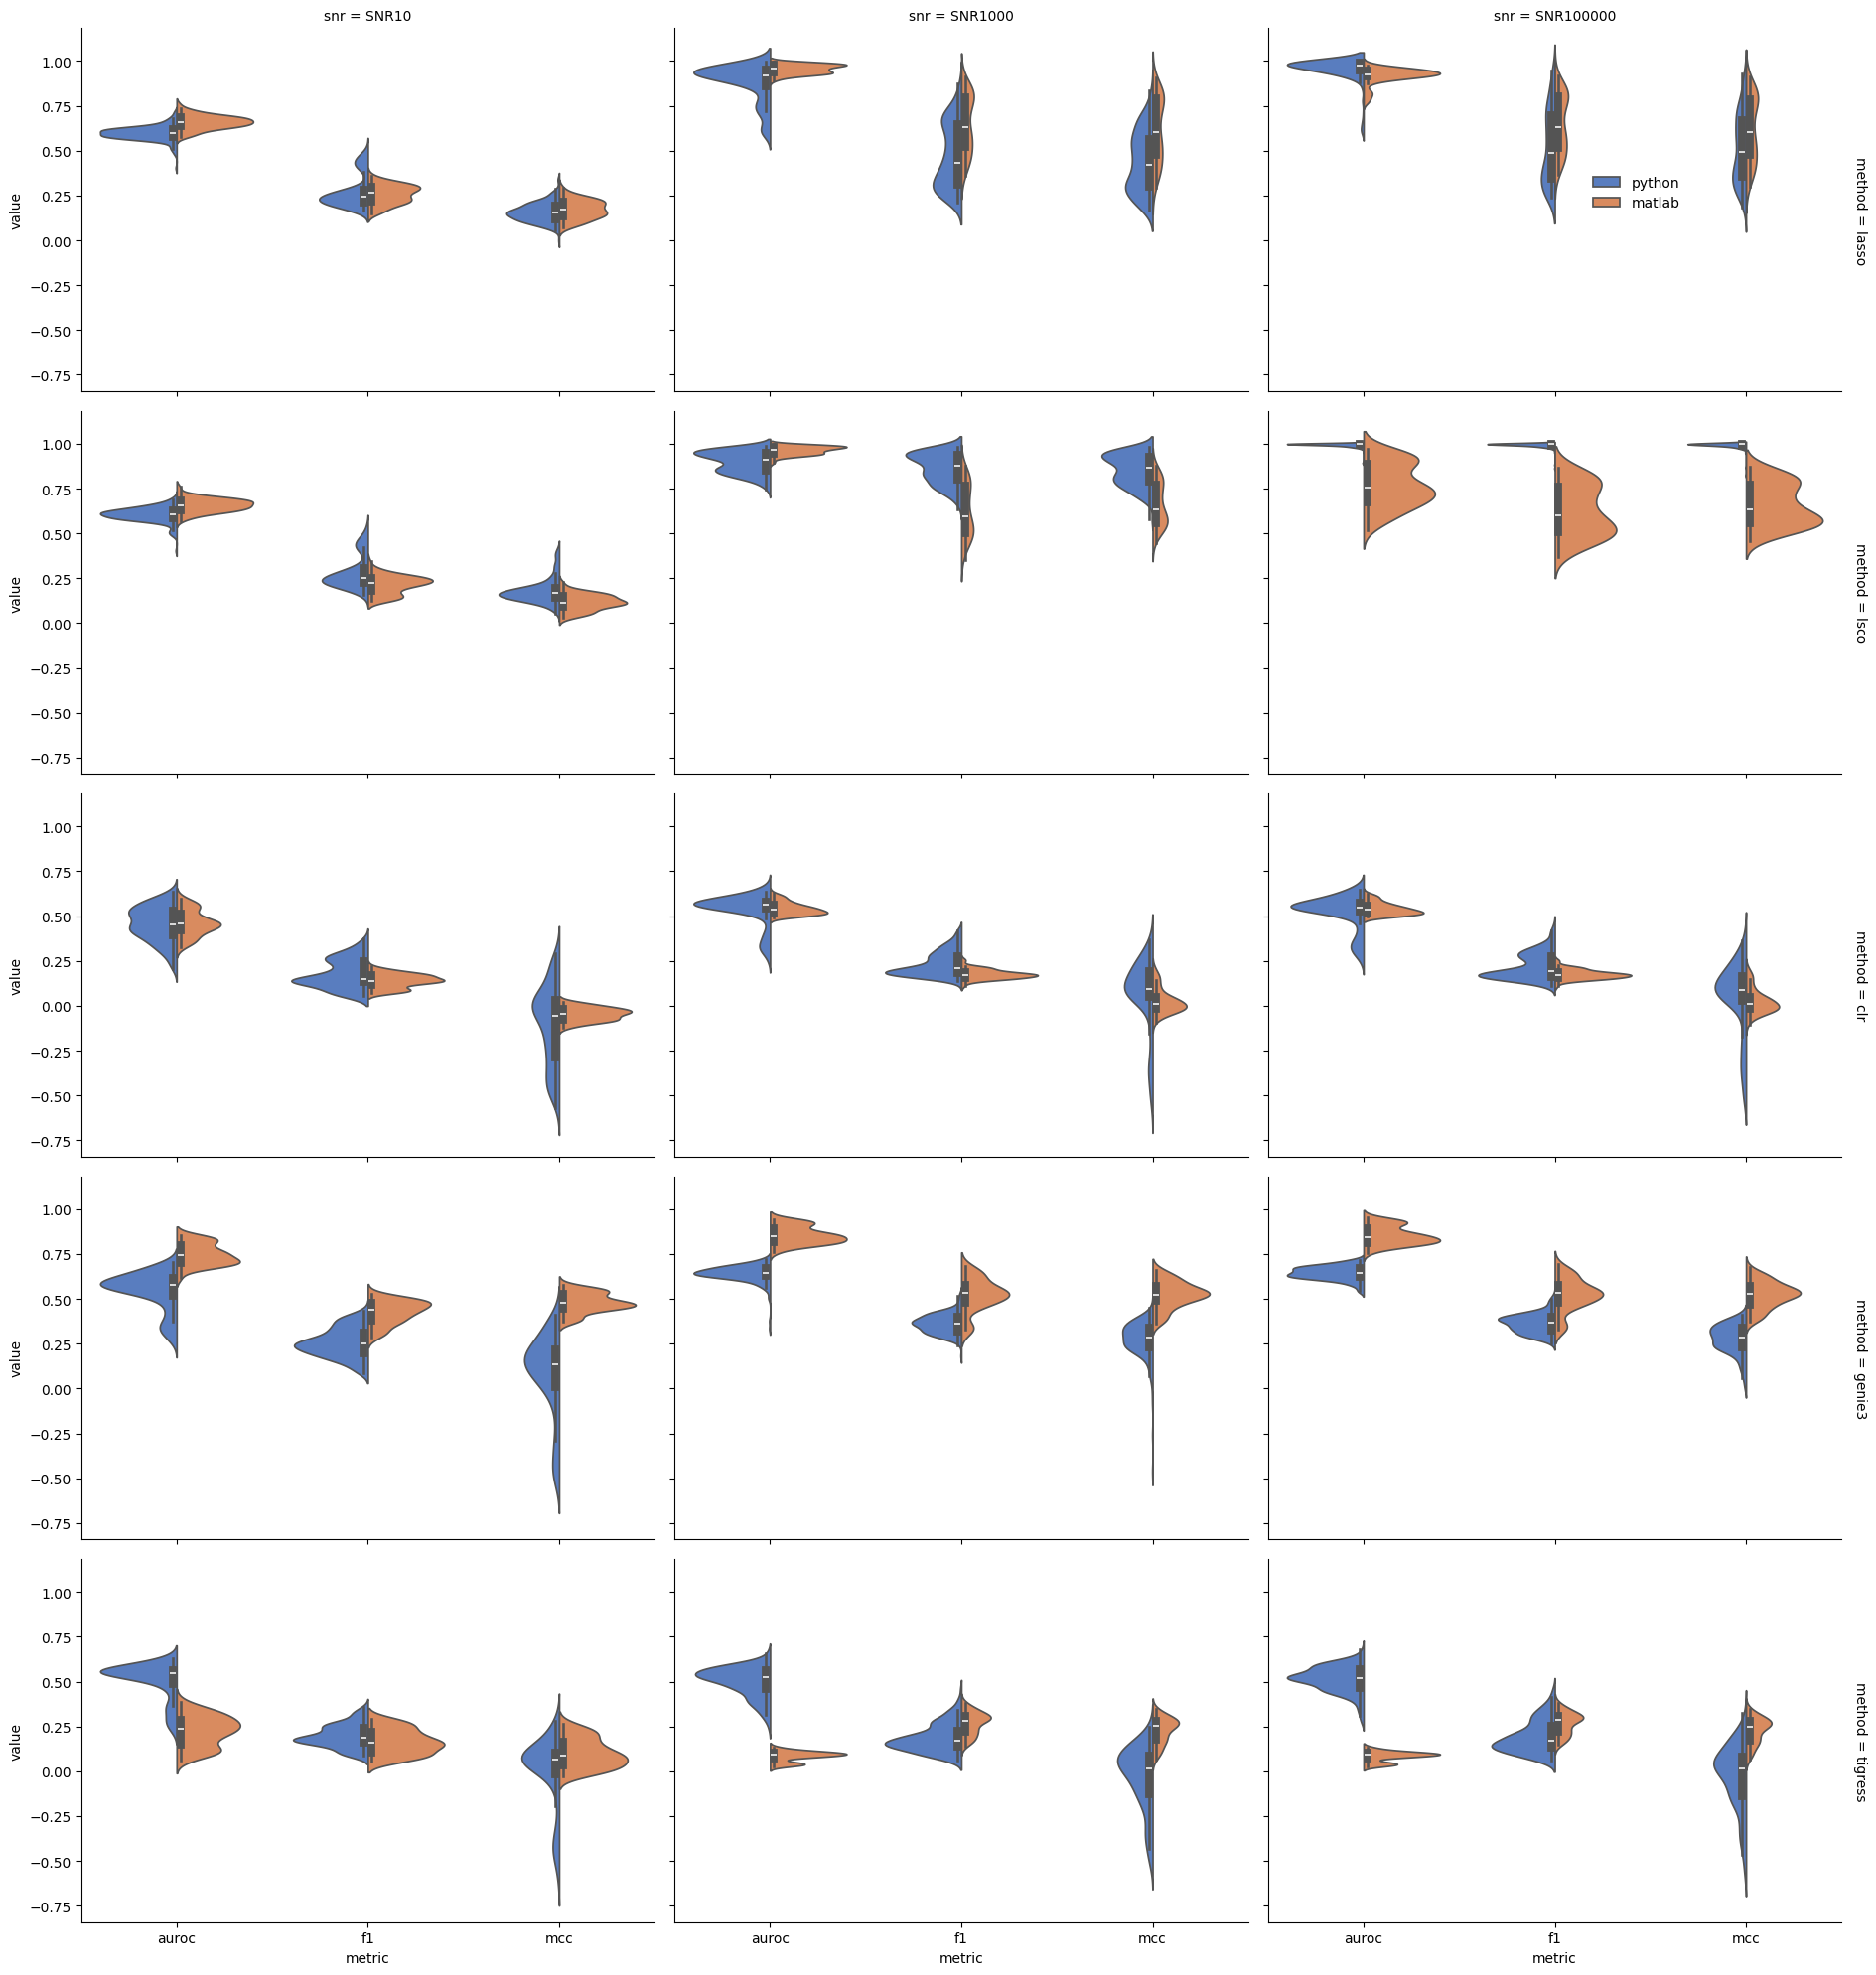

In [64]:
methods = ['clr','genie3','lasso', 'lsco', 'tigress']

# Plot
g = sns.FacetGrid(melted, col='snr', row='method', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.violinplot, split='language', x='metric', y='value', hue='language', palette='muted')
g.add_legend()
# Move legend to top right
g._legend.set_bbox_to_anchor((0.9, 0.9), transform=g.fig.transFigure)

# g.set_axis_labels('Metric', 'Score')
# g.set_titles(col_template='SNR: {col_name}', row_template='method: {row_name}')

plt.tight_layout()
plt.savefig('benchmark_results/plots/language_comparison_all.png', dpi=300)
# plt.close()
